In [77]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [78]:
df = pd.read_csv("/content/rent.csv")

In [79]:
df.head()

,title,price,area,location,status
0,1 BHK Apartment,"11,000",567,"Dhanori, Pune",Unfurnished
1,1 RK Studio Apartment,"5,000",300,"MAE Campus, Pune",Furnished
2,2 BHK Apartment,"19,000",1020,"Warje, Pune",Unfurnished
3,1 BHK Independent Floor,"5,500",500,"Lohegaon, Pune",Semi-Furnished
4,2 BHK Independent Floor,"14,999",950,"Lohegaon, Pune",Unfurnished


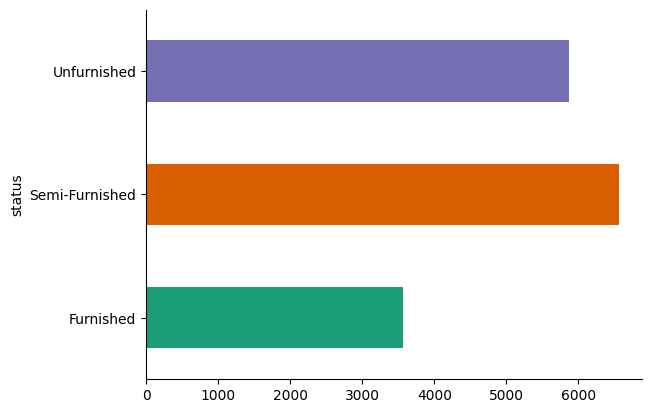

In [80]:
# @title status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15985 entries, 0 to 15984
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     15985 non-null  object
 1   price     15985 non-null  object
 2   area      15985 non-null  int64 
 3   location  15985 non-null  object
 4   status    15985 non-null  object
dtypes: int64(1), object(4)
memory usage: 624.5+ KB


In [82]:
df.shape

(15985, 5)

In [83]:
df['bedroom'] = df['title'].str.findall(r'([\d.]+)').str[0].astype(float)
print(df)

                                                   title   price  area  \
0                                        1 BHK Apartment  11,000   567   
1                                  1 RK Studio Apartment   5,000   300   
2                                        2 BHK Apartment  19,000  1020   
3                                1 BHK Independent Floor   5,500   500   
4                                2 BHK Independent Floor  14,999   950   
...                                                  ...     ...   ...   
15980            2 BHK Apartment in Bansal Shiva Heights  20,000  1200   
15981          3 BHK Apartment in Pride Purple Ruby Park  23,000  1500   
15982  3 BHK Apartment in Pride Purple Park Express P...  27,000  1440   
15983                   2 BHK Apartment in Vasant Avenue  17,500   900   
15984          1 BHK Apartment in Tejas Poorva Residency  15,000   602   

                    location          status  bedroom  
0              Dhanori, Pune     Unfurnished      1.0  

In [84]:
df.head()

,title,price,area,location,status,bedroom
0,1 BHK Apartment,"11,000",567,"Dhanori, Pune",Unfurnished,1.0
1,1 RK Studio Apartment,"5,000",300,"MAE Campus, Pune",Furnished,1.0
2,2 BHK Apartment,"19,000",1020,"Warje, Pune",Unfurnished,2.0
3,1 BHK Independent Floor,"5,500",500,"Lohegaon, Pune",Semi-Furnished,1.0
4,2 BHK Independent Floor,"14,999",950,"Lohegaon, Pune",Unfurnished,2.0


In [85]:
df.isnull().sum()

,0
title,0
price,0
area,0
location,0
status,0
bedroom,0


In [86]:
price = df.price.tolist()

In [87]:
price_int = []
for x in price:
    if type(x) == type(0):
        price_int.append(x)
    elif x[-1] == 'L':
        price_int.append(int(float(x.split()[0])) * 100000)
    elif type(x) == type('p'):
        price_int.append(int(x.replace(',','')))


In [88]:
price_final=[]
for item in price_int:
    price_final.append(float(item))
print(price_final, end=" ")
print(type(price_final))


[11000.0, 5000.0, 19000.0, 5500.0, 14999.0, 10000.0, 16800.0, 6500.0, 20000.0, 8200.0, 11000.0, 70000.0, 5500.0, 35000.0, 20000.0, 100000.0, 7500.0, 7200.0, 16000.0, 7000.0, 6000.0, 8000.0, 15000.0, 12000.0, 17000.0, 9500.0, 30000.0, 12000.0, 6800.0, 8500.0, 15000.0, 15000.0, 5500.0, 7500.0, 23000.0, 10000.0, 20000.0, 11000.0, 100000.0, 100000.0, 35000.0, 32000.0, 7500.0, 18000.0, 400000.0, 11000.0, 15500.0, 27000.0, 17000.0, 60000.0, 200000.0, 50000.0, 42000.0, 16000.0, 20000.0, 35000.0, 25000.0, 27500.0, 15795.0, 40000.0, 42000.0, 50000.0, 19000.0, 8500.0, 12000.0, 20000.0, 32000.0, 24500.0, 13500.0, 100000.0, 36000.0, 41000.0, 9000.0, 50000.0, 45000.0, 14500.0, 21000.0, 22500.0, 17000.0, 14000.0, 26000.0, 37000.0, 13000.0, 22000.0, 9000.0, 65000.0, 18000.0, 100000.0, 75000.0, 10500.0, 15000.0, 20000.0, 18000.0, 12900.0, 15500.0, 22000.0, 25000.0, 85000.0, 25000.0, 45000.0, 7500.0, 6000.0, 11000.0, 6500.0, 6700.0, 16000.0, 6000.0, 4500.0, 4500.0, 35000.0, 35000.0, 35000.0, 35000.0, 3

In [89]:
df['rent'] = price_int

In [90]:
df.head()

,title,price,area,location,status,bedroom,rent
0,1 BHK Apartment,"11,000",567,"Dhanori, Pune",Unfurnished,1.0,11000
1,1 RK Studio Apartment,"5,000",300,"MAE Campus, Pune",Furnished,1.0,5000
2,2 BHK Apartment,"19,000",1020,"Warje, Pune",Unfurnished,2.0,19000
3,1 BHK Independent Floor,"5,500",500,"Lohegaon, Pune",Semi-Furnished,1.0,5500
4,2 BHK Independent Floor,"14,999",950,"Lohegaon, Pune",Unfurnished,2.0,14999


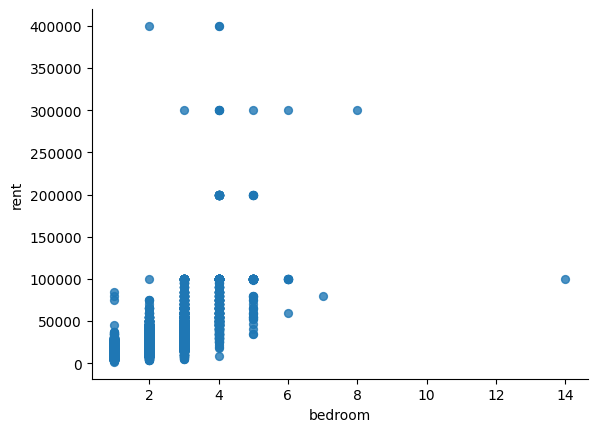

In [112]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bedroom', y='rent', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

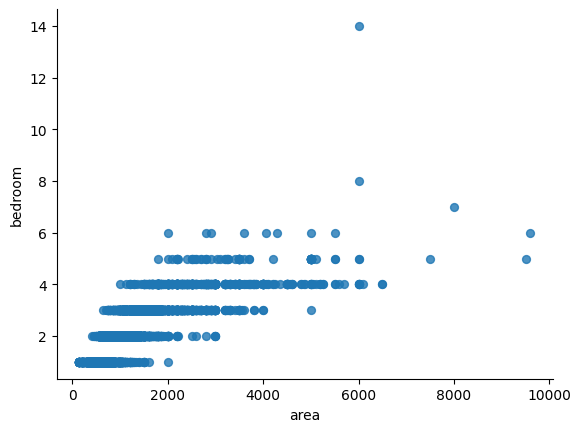

In [113]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='area', y='bedroom', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [91]:
df2=df.drop('price',axis=1)

<Axes: xlabel='rent'>

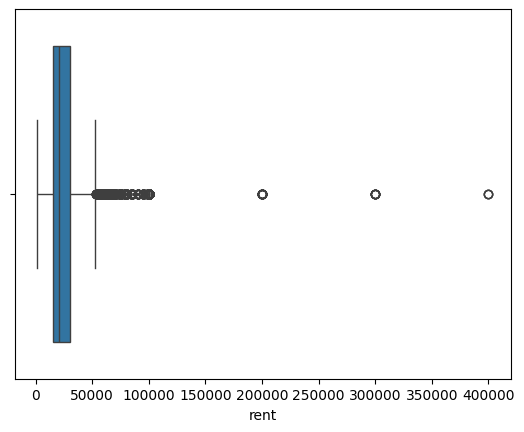

In [92]:
sns.boxplot(data = df2,x='rent')

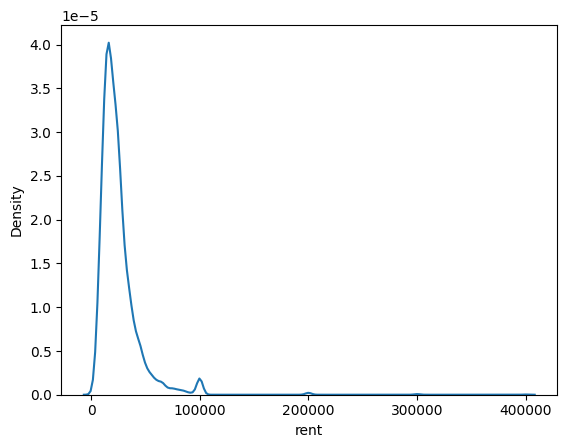

In [93]:
sns.kdeplot(df2['rent']);

In [94]:
df2.location =df2.location.apply(lambda x : x.strip())
locationc = df2.groupby('location')['location'].count().sort_values(ascending=False)
locationc

,location
location,
"Wagholi, Pune",1766
"Hadapsar, Pune",1102
"Kharadi, Pune",1086
"Viman Nagar, Pune",901
"Hinjewadi, Pune",871
...,...
"Dhanakwadi, Pune",1
"Pashan Road, Pune",1
"Pashan Sus Road, Pune",1


In [95]:
df2.bedroom.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 14.])

In [96]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['location']= label_encoder.fit_transform(df2['location'])

In [97]:
X = df2.drop(['rent', 'title'], axis=1)
y= df2.rent

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [99]:
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'R2 score: {r2}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')

In [100]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ct = ColumnTransformer([('one-hot-encoder', OneHotEncoder(drop='first'), [2,3])], remainder='passthrough')

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3])])),
                ('step2', LinearRegression())])

In [101]:
y_pred = pipe.predict(X_test)

print("\nLinear Regression Results:")
evaluate_model(y_test, y_pred)


Linear Regression Results:
R2 score: 0.6384794351007625
MAE: 6599.325461747813
MSE: 150777009.31404167
RMSE: 12279.129012842957


In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3])])),
                ('step2', Ridge(alpha=10))])

In [103]:
y_pred = pipe.predict(X_test)

print("\nRidge Results:")
evaluate_model(y_test, y_pred)


Ridge Results:
R2 score: 0.6389204154067429
MAE: 6593.2008129454425
MSE: 150593092.5520156
RMSE: 12271.637729008122


In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[2,3])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3])])),
                ('step2', Lasso(alpha=0.001))])

In [105]:
y_pred = pipe.predict(X_test)

print("\nLasso Results:")
evaluate_model(y_test, y_pred)


Lasso Results:
R2 score: 0.6384794965127003
MAE: 6599.323751578732
MSE: 150776983.70136786
RMSE: 12279.12796990763


In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [2, 3])
], remainder='passthrough')

step2 = DecisionTreeRegressor(random_state=2)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3])])),
                ('step2', DecisionTreeRegressor(random_state=2))])

In [107]:
y_pred = pipe.predict(X_test)

print("Decision Tree Results:")
evaluate_model(y_test, y_pred)

Decision Tree Results:
R2 score: 0.41454622934309593
MAE: 5085.734817999627
MSE: 244171361.7477893
RMSE: 15625.983544973715


In [108]:
step2 = RandomForestRegressor(n_estimators=100, random_state=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [2, 3])])),
                ('step2', RandomForestRegressor(random_state=10))])

In [109]:
y_pred = pipe.predict(X_test)

print("\nRandom Forest Results:")
evaluate_model(y_test, y_pred)


Random Forest Results:
R2 score: 0.61959716249395
MAE: 4680.721098192639
MSE: 158652114.82429436
RMSE: 12595.718114672714
